<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> Dogs Vs Cats Classification Problem 📷 🚀 </h1> </div>
The Dogs & Cats is a foundational problem for a basic CNN(convolutional neural network) model which involves classifying images as a dog or a cat.The dataset can be used for learning how to develop,evaluate and use convolutional deep learning neural networks for classification of images. This includes how to develop a robust test harness for estimating the performance of the model, exploring improvements for the model by changing the paramters of the model, saving and loading the model to make predicitions on new data.

![1_EvMbMNRHm_aOf1n4tDO1Xg.jpg](attachment:0e084368-1f23-4445-a9d6-d0bd7fb563a7.jpg)

<a id='3'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Loading Libraries </h2> </div>

In [2]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

<a id='4'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Extraction </h2> </div>

In [ ]:
train_path = "/content/drive/MyDrive/data/train.zip"
test_path = "/content/drive/MyDrive/data/test1.zip"

files = "/content/working/"

import zipfile

# Extract train.zip
with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)

# Extract test1.zip
with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading Images in a Dataframe

In [ ]:
import os
import pandas as pd

# Define the directory where the images were extracted
image_dir = "/content/working/train/"

# Get the list of image filenames
filenames = os.listdir(image_dir)

# Extract labels from filenames
labels = [x.split(".")[0] for x in filenames]

# Create a DataFrame with filenames and labels
data = pd.DataFrame({"filename": filenames, "label": labels})

# Display the first few rows of the DataFrame
data.head()


,filename,label
0,dog.12100.jpg,dog
1,dog.6602.jpg,dog
2,dog.6273.jpg,dog
3,cat.2874.jpg,cat
4,cat.4736.jpg,cat


<a id='5'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Exploration </h2> </div>

First, we start by visualizing the variable of interest.

Let's view more images in a grid format.

<h5 style="text-align:center;color:Green">We visualize few images of Dogs. </h5>

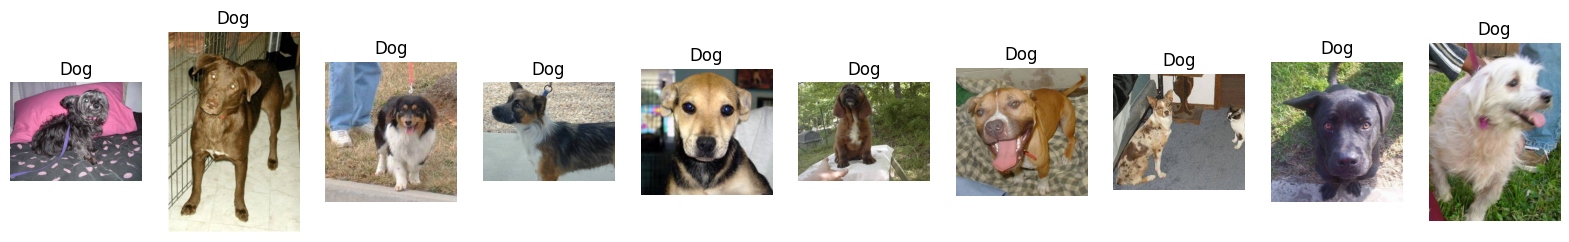

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Display a grid of images
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

# Loop through the first 10 images
for i in range(10):
    plt.subplot(1, 10, i+1)    # the number of images in the grid is 10
    filename = os.path.join('/content/working/train', 'dog.' + str(i) + '.jpg')
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog', fontsize=12)
    plt.axis('off')

plt.show()


<h5 style="text-align:center;color:Red">We visualize few images of Cats. </h5>

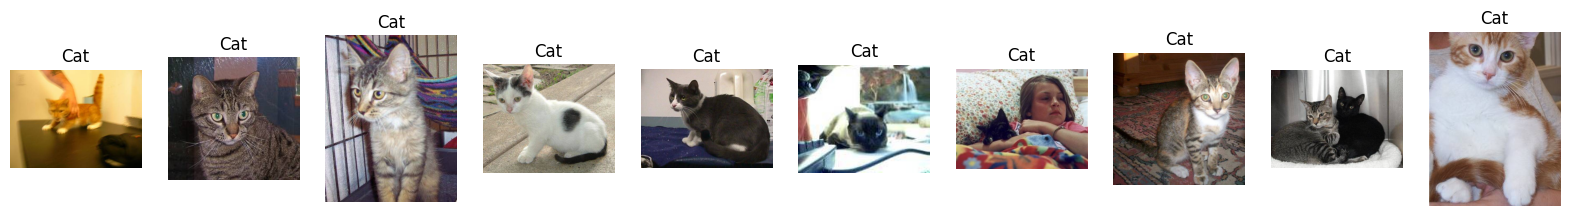

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

# Define the directory where the images are located
image_dir = "/content/working/train/"

# Display a grid of images
plt.figure(figsize=(20, 20))  # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

# Loop through the first 10 images of cats
for i in range(10):
    plt.subplot(1, 10, i + 1)  # the number of images in the grid is 10
    filename = os.path.join(image_dir, 'cat.' + str(i) + '.jpg')
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat', fontsize=12)
    plt.axis('off')

plt.show()


Images are of varying size.

Every time the cell is run different set of images will be displayed, one can scan the images of both categories. Presence of humans in some images could be a challenge for the model to classify.

Some images have more than one cats or dogs respectively.

<a id='6'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Train Test Split </h2> </div>

<a id='7'></a>
<div class="alert alert-block alert-warning"><h4 style="text-align:center;color:black"> Using Dataframe </h4> </div>

In [ ]:
# train test split using dataframe

labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


Now we will Create a barplot to see the class distrubtion in trainting dataset.

<ipython-input-11-418fb063fcee>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
<ipython-input-11-418fb063fcee>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
<ipython-input-11-418fb063fcee>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',w

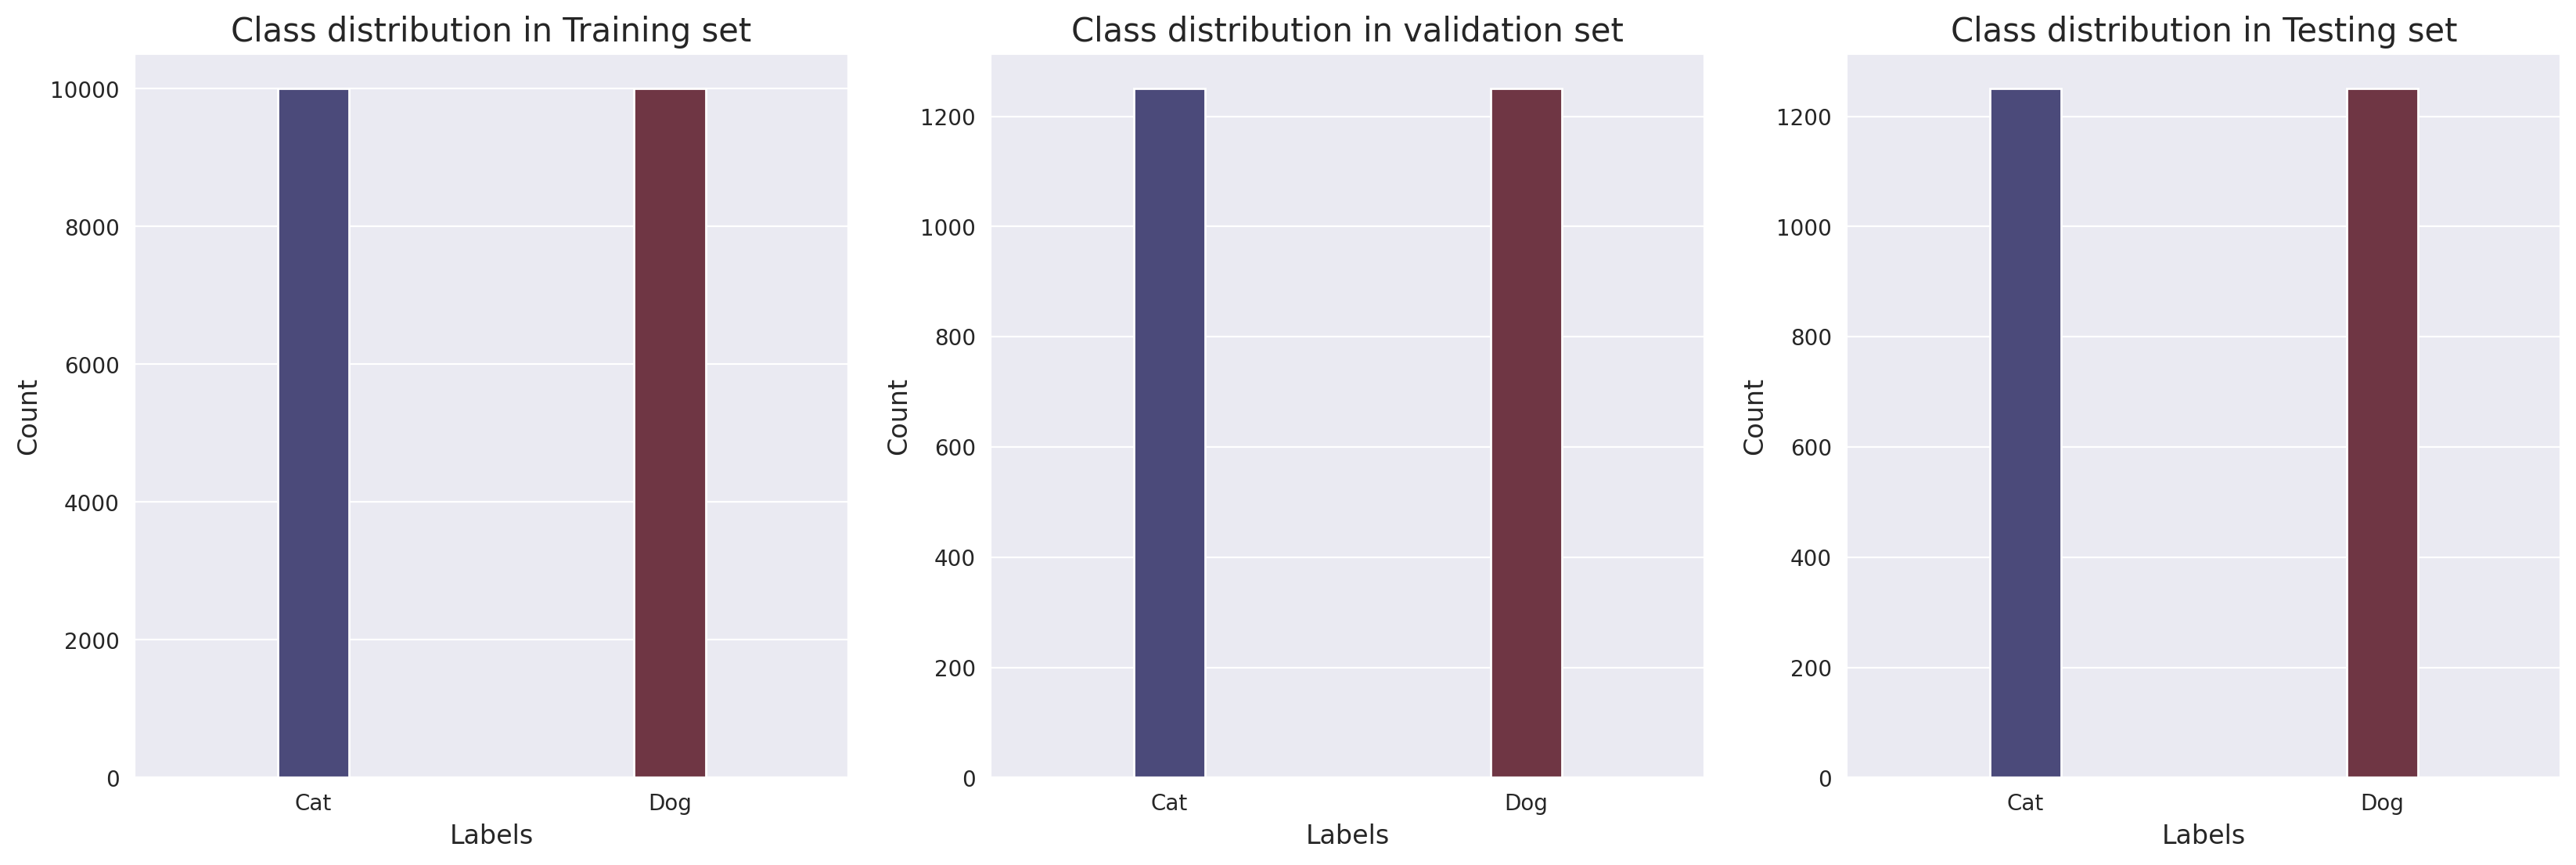

In [ ]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

<a id='8'></a>
<div class="alert alert-block alert-warning"><h4 style="text-align:center;color:black"> Using Directory </h4> </div>

In [ ]:
import os
from os import makedirs, listdir
from shutil import copyfile
from random import seed, random

# Create directories
dataset_home = '/content/working/dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdir in subdirs:
    # Create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

# Seed random number generator
seed(1)
# Define ratio of pictures to use for validation
val_ratio = 0.2
# Copy training dataset images into subdirectories
src_directory = '/content/working/train'
for file in listdir(src_directory):
    src = os.path.join(src_directory, file)
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = os.path.join(dataset_home, dst_dir, 'cats', file)
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = os.path.join(dataset_home, dst_dir, 'dogs', file)
        copyfile(src, dst)

# Define paths
path1 = os.path.join(dataset_home, 'train/cats')
path2 = os.path.join(dataset_home, 'train/dogs')
path3 = os.path.join(dataset_home, 'test/cats')
path4 = os.path.join(dataset_home, 'test/dogs')

print('The number of cat images in training data is', len(os.listdir(path1)))
print('The number of dog images in training data is', len(os.listdir(path2)))
print('The number of cat images in validation data is', len(os.listdir(path3)))
print('The number of dog images in validation data is', len(os.listdir(path4)))


The number of cat images in training data is 9932
The number of dog images in training data is 9978
The number of cat images in validation data is 2568
The number of dog images in validation data is 2522


<a id='9'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation </h2> </div>

firstly, we will list out all the important parameters and respective values.

In [ ]:
# parameters
image_size = 128
image_channel = 3
bat_size = 32

<a id='10'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">Image Data Generator </h3> </div>

* The data for will used by flow_from_dataframe and flow_from_directory.
* The batch size is 32 and the image size is (128,128).


In [ ]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

<a id='11'></a>
<div class="alert alert-block alert-warning"><h4 style="text-align:center;color:black"> Using Dataframe </h4> </div>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the batch size and image size
bat_size = 32
image_size = 150

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming X_train, X_val, and X_test are DataFrames with 'filename' and 'label' columns
# Make sure the paths to your datasets are correct
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory='/content/working/dataset_dogs_vs_cats/train/',
                                                    x_col='filename',
                                                    y_col='label',
                                                    batch_size=bat_size,
                                                    target_size=(image_size, image_size))

val_generator = test_datagen.flow_from_dataframe(X_val,
                                                 directory='/content/working/dataset_dogs_vs_cats/train/',
                                                 x_col='filename',
                                                 y_col='label',
                                                 batch_size=bat_size,
                                                 target_size=(image_size, image_size),
                                                 shuffle=False)

test_generator = test_datagen.flow_from_dataframe(X_test,
                                                  directory='/content/working/dataset_dogs_vs_cats/test/',
                                                  x_col='filename',
                                                  y_col='label',
                                                  batch_size=bat_size,
                                                  target_size=(image_size, image_size),
                                                  shuffle=False)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 20000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2500 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 2500 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


<a id='12'></a>
<div class="alert alert-block alert-warning"><h4 style="text-align:center;color:black"> Using Directory </h4> </div>

In [ ]:
train_gen = train_datagen.flow_from_directory('/kaggle/working/dataset_dogs_vs_cats/train/',
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

val_gen = test_datagen.flow_from_directory('/kaggle/working/dataset_dogs_vs_cats/test/',
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the batch size and image size
bat_size = 32
image_size = 128

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Using flow_from_directory for the train, validation, and test datasets
train_dir = '/content/working/dataset_dogs_vs_cats/train/'
test_dir = '/content/working/dataset_dogs_vs_cats/test/'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='binary',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='binary',
    shuffle=False
)


Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.


In [ ]:
import os

base_dir = '/content/working/dataset_dogs_vs_cats/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

print('Train Directory:', os.listdir(train_dir))
print('Test Directory:', os.listdir(test_dir))

print('Train/Cats:', len(os.listdir(os.path.join(train_dir, 'cats'))))
print('Train/Dogs:', len(os.listdir(os.path.join(train_dir, 'dogs'))))
print('Test/Cats:', len(os.listdir(os.path.join(test_dir, 'cats'))))
print('Test/Dogs:', len(os.listdir(os.path.join(test_dir, 'dogs'))))


Train Directory: ['dogs', 'cats']
Test Directory: ['dogs', 'cats']
Train/Cats: 9932
Train/Dogs: 9978
Test/Cats: 2568
Test/Dogs: 2522


Found 19910 images belonging to 2 classes.
Found 5090 images belonging to 2 classes.
Class indices: {'cats': 0, 'dogs': 1}


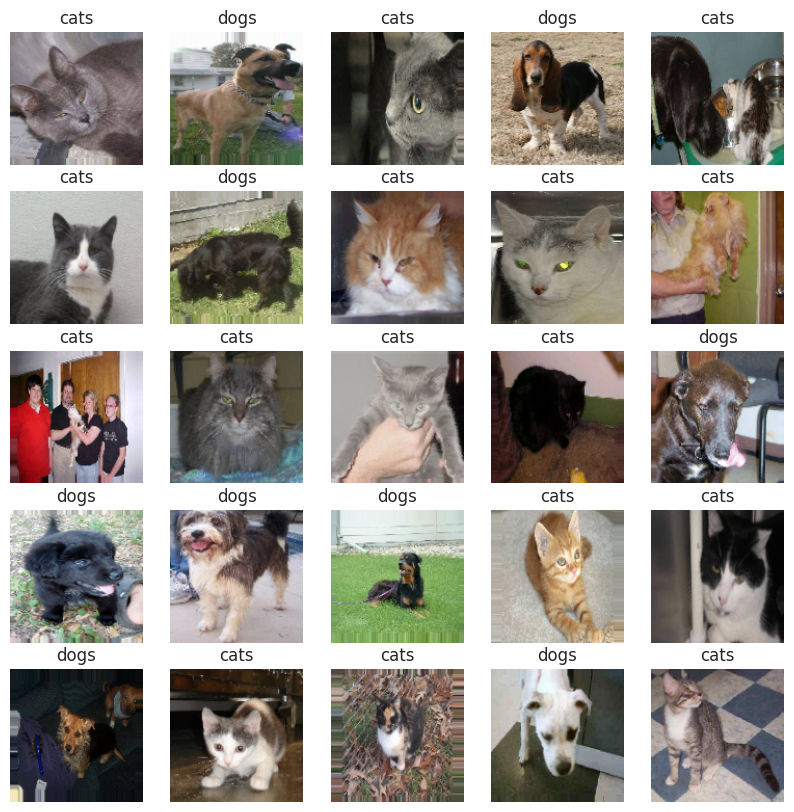

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define parameters
bat_size = 32
image_size = 128

# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Directory paths
train_dir = '/content/working/dataset_dogs_vs_cats/train/'
test_dir = '/content/working/dataset_dogs_vs_cats/test/'

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='binary'  # Assuming binary classification (cat vs. dog)
)

val_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=bat_size,
    class_mode='binary',
    shuffle=False  # Ensure validation set order is preserved
)

# Inspect the Data Generators
print('Class indices:', train_generator.class_indices)

# Get a batch of images and labels
images, labels = next(train_generator)
class_names = list(train_generator.class_indices.keys())

# Function to plot images
def plot_images(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis('off')
    plt.show()

# Plot a few images from the batch
plot_images(images[:25], labels[:25], class_names)


<a id='13'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep Learning Model </h2> </div>

<a id='14'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black">Model Layers </h3> </div>


### Architecture

The architecture of the Cat vs Dog Image Classification model consists of the following Layers and components:

#### Layers :
* The input layer consist of a Conv2D with 32 filters and activation relu.
* The model contain the 3 blocks of convolution with increasing filters and activation relu.
* Each convolution block contains Batch Noramlization, Max pooling (pool_size = 2) and Dropout (0.2).
* The fully connected layers contain Flatten layer, Dense layer with 512 units and a Dropout layer.
* The output layer is a Dense layer with 2 units and softmax activation.

#### Components:

* **Input Layer:** Receives input images for classification.
* **Convolutional Layers:** Extract features from the images through convolutional operations.
* **Pooling Layers:** Reduce the spatial dimensions of the feature maps.
* **Flatten Layer:** Convert the 2D feature maps into a 1D vector.
* **Fully Connected Layers:** Perform classification using densely connected layers.
* **Output Layer:** Provides the final prediction probabilities for cat and dog classes.

In [ ]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

<a id='15'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Callbacks </h3> </div>
we will be using two callbacks -

* **ReduceLROnPlateau :** Reduce learning rate when a metric has stopped improving.
* **EarlyStopping :** Stop training when a monitored metric has stopped improving.

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            factor=0.5,
                                            min_lr = 0.00001,
                                            verbose = 1)

early_stoping = EarlyStopping(monitor='val_loss',patience= 3,restore_best_weights=True,verbose=0)

<a id='23'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Compile the model </h3> </div>
Finally we will compile the model .There are 3 things to mention here : Optimizer,Loss, Metrics

* **Optimizer** :- To minimize cost function we use different methods For ex :- like gradient descent, stochastic gradient descent. So these are call optimizers. We are using a default one here which is adam.
​
* **Loss** :- To make our model better we either minimize loss or maximize accuracy. Neural Networks always minimize loss. To measure it we can use different formulas like 'categorical_crossentropy' or 'binary_crossentropy'. Here I have used binary_crossentropy.
​
* **Metrics** :- This is to denote the measure of your model. Can be accuracy or some other metric.

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

<a id='16'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Fit the model </h3> </div>

We are now going to train our compiled model using the train iterator (train_generator) and use the val iterator (val_generator) as a validation dataset during training.

The number of steps for the train and validation iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and validation directories divided by the batch size (32).

The model will be fit for 30 epochs.

In [ ]:
cat_dog = model.fit(train_generator,
                    validation_data = val_generator,
                    callbacks=[early_stoping,learning_rate_reduction],
                    epochs = 30,
                    # steps_per_epoch = len(train_generator),
                    # validation_steps = len(val_generaotor),
                   )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the model architecture
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Fully Connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Print the model summary
model.summary()

# Define callbacks
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=2,
    factor=0.5,
    min_lr=0.00001,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=0
)

# Compile the model with binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    callbacks=[early_stopping, learning_rate_reduction],
    epochs=30,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_30 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_30 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_31 (Ba  (None, 61, 61, 64)       

<a id='17'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Plot the results </h3> </div>

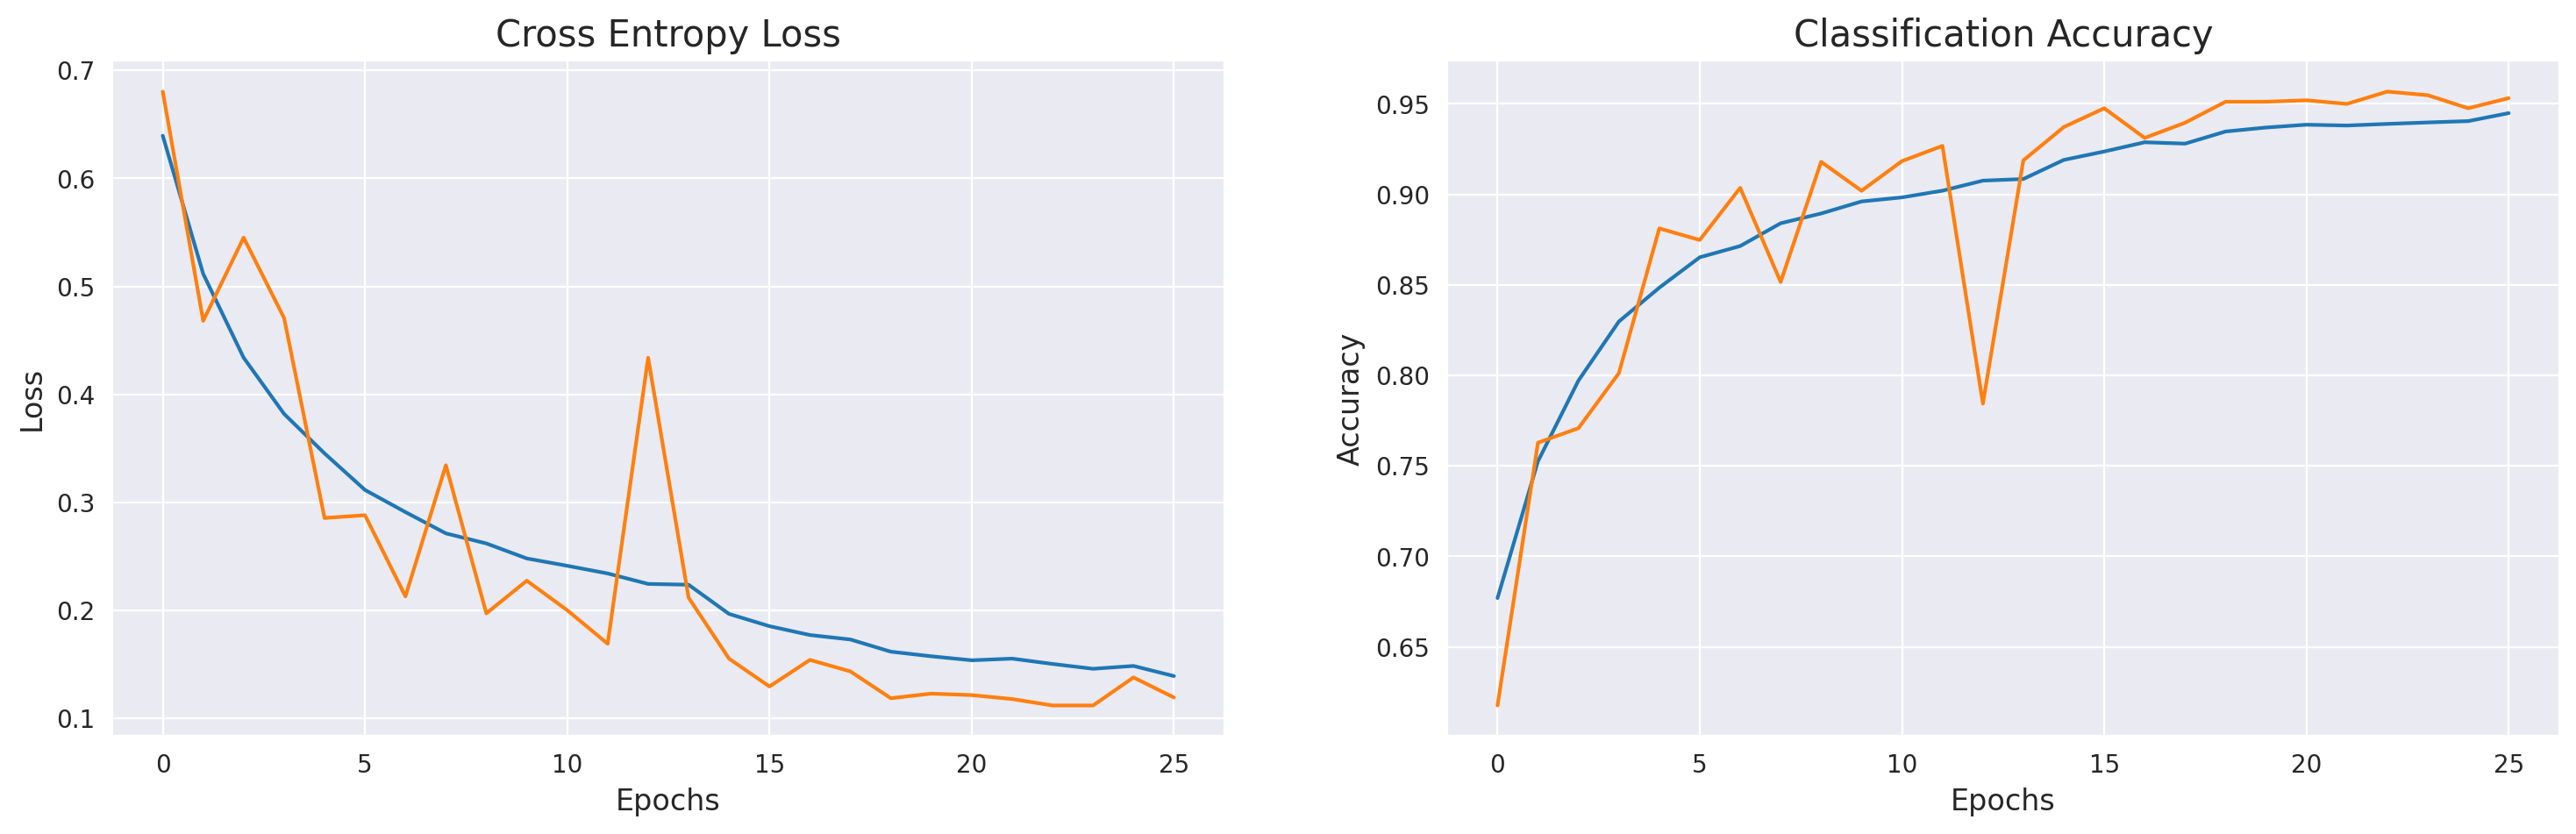

In [ ]:
# plots for accuracy and Loss with epochs

error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

<a id='18'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Evaluvation </h3> </div>

we will evaluvate the Training and validation data accuracy and loss.

In [ ]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 96.10999822616577
The Loss of the model for training data is: 0.10082946717739105
The accuracy of the model for validation data is: 95.67999839782715
The Loss of the model for validation data is: 0.11189615726470947


In [ ]:
# Save the Model
model.save("model.h5")

<a id='19'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Prediction </h2> </div>

Now, we will predict the model on test dataset.

In [ ]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 95.08000016212463
The Loss of the model for testing data is: 0.11678832769393921


Classification report

In [ ]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.95      0.96      0.95      1250
         Dog       0.96      0.95      0.95      1250

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



confusioin matrix

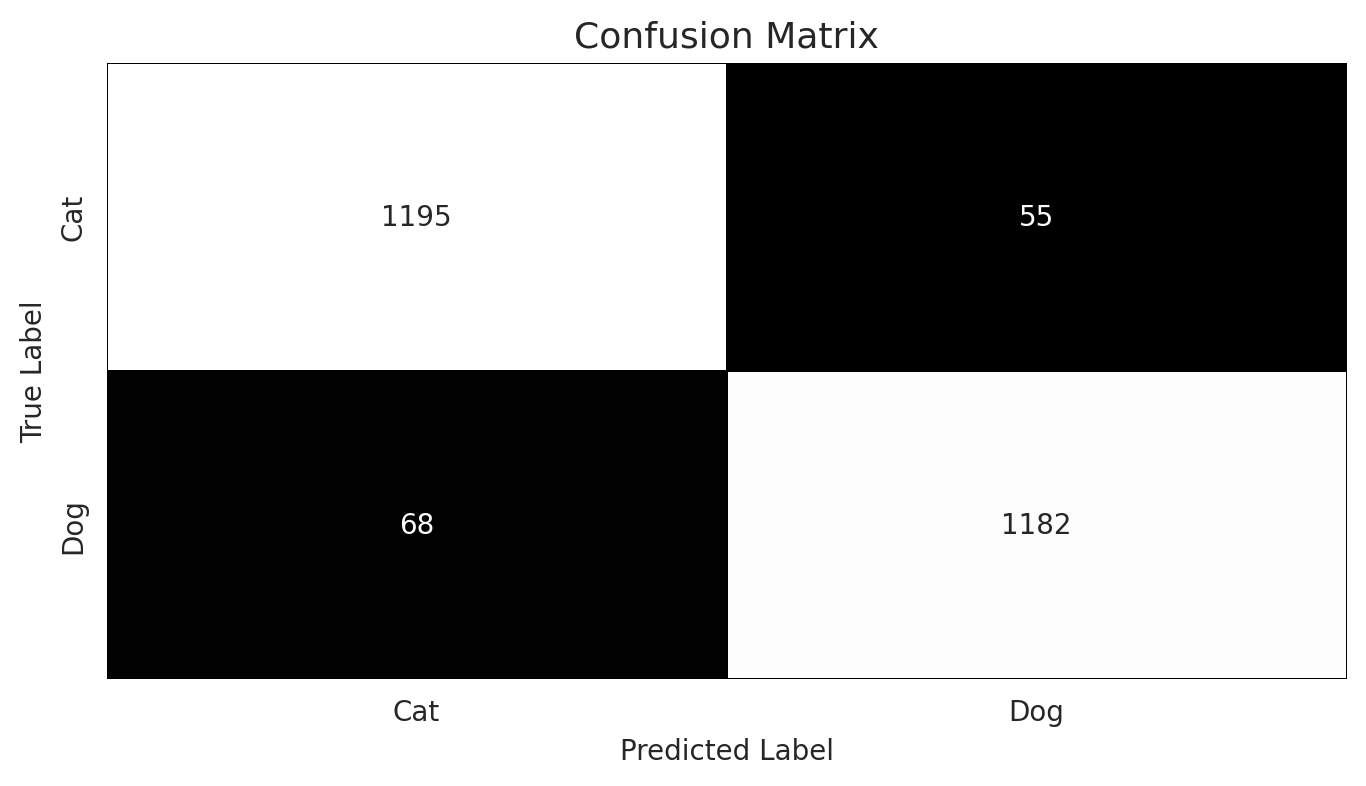

In [ ]:
confusion_mtx = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

<a id='20'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> submission </h2> </div>
Make predictions on kaggle test data for submission.

In [ ]:
size =(128,128)

# loading into dataframe
test_dir = "../working/test1/"
filenames = os.listdir(test_dir)
test_data = pd.DataFrame({"filename": filenames})
test_data['label'] = 'unknown'

# Create data genenerator for test data
test1_idg =  test_datagen.flow_from_dataframe(test_data,
                                     "test1/",
                                     x_col= "filename",
                                     y_col = 'label',
                                     batch_size = bat_size,
                                     target_size=size,
                                     shuffle = False)

# Test Prediction
test1_predict = model.predict(test1_idg,verbose = 0)

test1_predict_argmax = np.argmax(test1_predict, axis=1)

y_test_pred = test1_predict_argmax

test_data['label'] = y_test_pred

# mapping
label_mapping = {0: 'cat', 1: 'dog'}
test_data['label'] = test_data['label'].map(label_mapping)
test_data.head()

# csv file output for submission
sub = pd.read_csv('/kaggle/input/dogs-vs-cats/sampleSubmission.csv',index_col='id')

sub['label'] = y_test_pred

sub.to_csv('submission.csv',index=True)

Found 12500 validated image filenames belonging to 1 classes.


<a id='21'></a>
<div class="alert alert-block alert-danger"><h3 style="text-align:center;color:black"> Visualize Classified Images  </h3> </div>

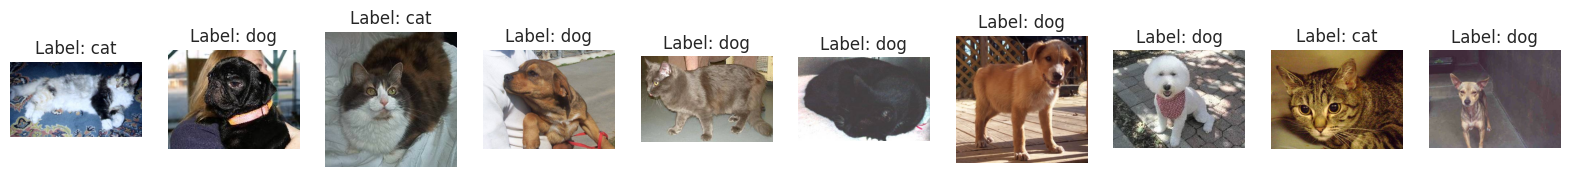

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 4))
for idx in range(10):
    image_path = os.path.join(test_dir, test_data.iloc[idx]['filename'])
    image = Image.open(image_path)
    axes[idx].imshow(image)
    axes[idx].set_title("Label: " + test_data.iloc[idx]['label'])
    axes[idx].axis('off')
plt.show()

After watching the images we can see the our model is quite accurate with 94% accuracy.


<a id='22'></a>
<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Conclusion </h2> </div>


We successfully built a deep neural network model by implementing Convolutional Neural Network (CNN) to classify dog and cat images with very high accuracy 97.32 %.

The model was used to predict the classes of the images from the independent test set and results were submitted to test the accuracy of the prediction with fresh data.

The Cat vs Dog Image Classification model demonstrates the successful implementation of a Convolutional Neural Network for image classification tasks. By accurately distinguishing between images of cats and dogs, this project showcases the potential of deep learning algorithms in solving real-world problems involving image analysis. Through this project, we aim to inspire further exploration of CNNs and their applications in various domains,